In [1]:
%run Data_new.ipynb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import datetime 
import time

oryginal_isotherms: 912
oryginal_bet: 912
oryginal_info: 912 



2025-03-04 13:26:04.420478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741091164.440431 1348816 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741091164.446211 1348816 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 13:26:04.466374: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def calculate_time(transcription_time):
    timedelta_obj = datetime.timedelta(seconds=int(transcription_time))
    return str(timedelta_obj)

In [14]:
size = 40
X,y,info,oryginal = get_data(size,flat=True);
# for e in X[0]:
#     print(e)
y_all_nested = []
for i in range(len(y)):
    y_all_nested.append([y[i],info[i]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y_all_nested, test_size=0.02, random_state=42) #random_state=42
y_train = [item[0] for item in y_train_nested]
y_train = np.array(y_train).astype(float)
y_test = [item[0] for item in y_test_nested]
y_test = np.array(y_test).astype(float)
# print(y_train)
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X[0])
#for n in X[0]:
#    print(n)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train[0])
print(len(X_train))
print(len(X_test))

flat=True, returned one dimension data= [x,y,x,y,x,y,...]
X (912, 80)
y (912,)
info 912
oryginal_isotherms 912
return: X, y, info, oryginal_isotherms
893
19


In [15]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
print(len(X_train[0]))
X_train[0]

80


array([ 0.00000000e+00,  0.00000000e+00,  5.30156654e-04, -3.22947079e-01,
        2.74118296e-03, -1.23595278e-01, -1.41804463e-02,  3.84356930e-01,
       -4.35983127e-02,  8.42040154e-01, -1.17142752e-01,  7.98450533e-01,
       -1.82318032e-01,  7.58115426e-01, -1.17762719e-01,  7.73244307e-01,
       -4.71881803e-02,  7.49436483e-01, -8.40970964e-03,  7.27079714e-01,
       -3.28549122e-02,  6.82292463e-01, -6.98951226e-02,  6.48709484e-01,
       -8.68770775e-02,  6.10031758e-01, -1.24477167e-01,  5.66603496e-01,
       -1.28221528e-01,  5.40474803e-01, -1.52641700e-01,  5.13152368e-01,
       -2.09481513e-01,  4.83526002e-01, -2.71936570e-01,  4.56079650e-01,
       -3.12793142e-01,  4.25935574e-01, -3.59384179e-01,  4.02852556e-01,
       -3.67524313e-01,  3.73113414e-01, -3.88146940e-01,  3.48673998e-01,
       -4.05981886e-01,  3.35327797e-01, -4.36638389e-01,  3.24813110e-01,
       -4.69859334e-01,  3.07843570e-01, -5.15385050e-01,  2.91737459e-01,
       -5.71916023e-01,  

In [18]:
epochs_number = 500

model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(size)),  
    tf.keras.layers.Dense(size, activation='relu'), 
    tf.keras.layers.Dense(10000, activation='relu'), 
    tf.keras.layers.Dense(1)                      
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mae', metrics=metrics)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
start = time.time()
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=100,validation_split=0.1, verbose=2)
end = time.time()
transcription_time = calculate_time(round((end - start),2))
print(f"Model training time: "+transcription_time)

results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")


Epoch 1/500
9/9 - 2s - 216ms/step - loss: 1042.9197 - mae: 1042.9197 - mse: 1541648.7500 - val_loss: 1054.9662 - val_mae: 1054.9662 - val_mse: 1535333.5000
Epoch 2/500
9/9 - 0s - 8ms/step - loss: 1011.7839 - mae: 1011.7839 - mse: 1466592.7500 - val_loss: 997.8602 - val_mae: 997.8602 - val_mse: 1407905.8750
Epoch 3/500
9/9 - 0s - 8ms/step - loss: 940.2017 - mae: 940.2017 - mse: 1288044.0000 - val_loss: 900.0463 - val_mae: 900.0463 - val_mse: 1158845.6250
Epoch 4/500
9/9 - 0s - 8ms/step - loss: 816.1072 - mae: 816.1072 - mse: 978540.3750 - val_loss: 762.2095 - val_mae: 762.2095 - val_mse: 794821.6250
Epoch 5/500
9/9 - 0s - 8ms/step - loss: 643.5444 - mae: 643.5444 - mse: 597259.5000 - val_loss: 568.3998 - val_mae: 568.3998 - val_mse: 402054.6562
Epoch 6/500
9/9 - 0s - 8ms/step - loss: 439.7008 - mae: 439.7008 - mse: 278485.0625 - val_loss: 381.5803 - val_mae: 381.5803 - val_mse: 224613.8438
Epoch 7/500
9/9 - 0s - 8ms/step - loss: 390.8600 - mae: 390.8600 - mse: 265519.0625 - val_loss: 36

Model training time without gpu, epoch = 1000 : 0:01:10

In [19]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

Metrics: [73.13146209716797, 73.13146209716797, 11303.990234375]
mae = 73.13146209716797
mse = 11303.990234375


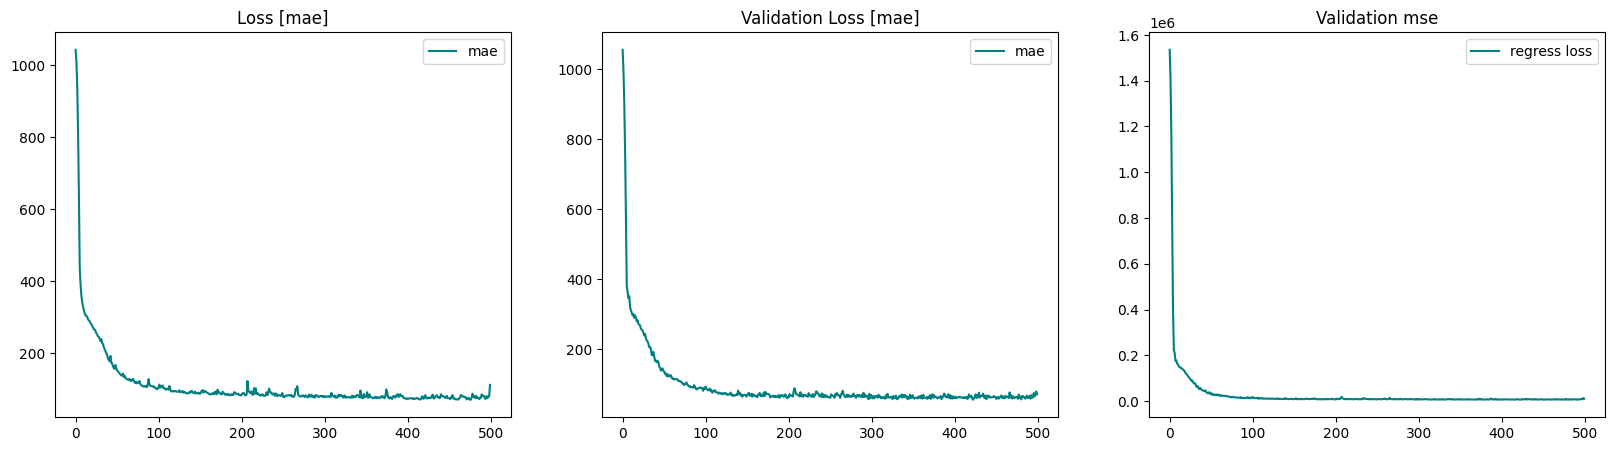

In [20]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='mae')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mae]')
ax[0].legend()

ax[1].plot(history.history['val_loss'], color='teal', label='mae')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mae]')
ax[1].legend()

ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Validation mse')
ax[2].legend()

plt.show()

In [21]:
error_threshold = 30
max_error_threshold = 30
predictions = model.predict(X_test, verbose=0)
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print("\nALL:")
for i in range(len(predictions)):
    print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

 przewidywana --> [2342.4456]     2662.0 <-- rzeczyswista     blad: [319.55444336]  ['Data114', 'CS', '1']
 przewidywana --> [352.10068]     383.5 <-- rzeczyswista     blad: [31.39932251]  ['Data91', 'AC-ME1', '3_2']
 przewidywana --> [875.6402]     927.0 <-- rzeczyswista     blad: [51.35980225]  ['Data148', 'WN700', '1_2']
 przewidywana --> [685.75854]     583.0 <-- rzeczyswista     blad: [102.75854492]  ['Data54', 'CZ0.15', '3']
 przewidywana --> [447.92984]     415.0 <-- rzeczyswista     blad: [32.92984009]  ['Data117', 'CTPC', '2_1']
 przewidywana --> [180.66878]     26.0 <-- rzeczyswista     blad: [154.66877747]  ['Data125', 'bengkirai_wood_400', '3']
 przewidywana --> [425.93546]     548.0 <-- rzeczyswista     blad: [122.06454468]  ['Data12', 'N-2', '2']
 przewidywana --> [904.2401]     947.0 <-- rzeczyswista     blad: [42.7598877]  ['Data75', '1-5h', '4_3']
 przewidywana --> [200.1015]     366.0 <-- rzeczyswista     blad: [165.89849854]  ['Data7', 'RK-500', '3']
 przewidywana --

In [22]:
# model.save("model_500_mae27_maxerror-57_warstwy-100-10000-50.keras")

In [23]:
from tensorflow.keras.models import load_model
model_name = 'model_500_mae27_maxerror-57_warstwy-100-10000-50.keras'
modelos = load_model(model_name)
predictions = modelos.predict(X_test, verbose=0)
print(f"len {len(X_test)}")
error_threshold = 30
max_error_threshold = 30
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)
print("\nALL:")
for i in range(len(predictions)):
    print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        


print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

len 19
 przewidywana --> [910.5134]     864.0 <-- rzeczyswista     blad: [46.51342773]  ['Data61', 'CB', '1']
 przewidywana --> [641.17584]     583.0 <-- rzeczyswista     blad: [58.17584229]  ['Data54', 'CZ0.15', '3']
 przewidywana --> [741.87866]     780.0 <-- rzeczyswista     blad: [38.12133789]  ['Data45', 'C-800-40', '1']
 przewidywana --> [734.0487]     790.0 <-- rzeczyswista     blad: [55.95129395]  ['Data5', 'S2AC-3h', '5_2']
 przewidywana --> [502.22983]     548.0 <-- rzeczyswista     blad: [45.77017212]  ['Data12', 'N-2', '2']
 przewidywana --> [245.48839]     366.0 <-- rzeczyswista     blad: [120.51161194]  ['Data7', 'RK-500', '3']
 przewidywana --> [1304.8511]     1357.0 <-- rzeczyswista     blad: [52.14892578]  ['Data89', 'AC-7', '3']
 przewidywana --> [1406.3342]     1357.0 <-- rzeczyswista     blad: [49.33422852]  ['Data89', 'AC-7', '4']
 przewidywana --> [969.36456]     930.0 <-- rzeczyswista     blad: [39.36456299]  ['Data90', 'AC-800', '2']

ALL:
 przewidywana --> [267

In [ ]:
#  przewidywana --> [553.189]     249.0 <-- rzeczyswista     blad: [304.18903]  ['Data125', 'coconut_shells_6h', '7']
#  przewidywana --> [1967.7969]     1616.22 <-- rzeczyswista     blad: [351.5769]  ['Data153', 'GC-C04', '4']
#  przewidywana --> [1556.715]     1193.2 <-- rzeczyswista     blad: [363.515]  ['Data54', 'CZ0.65', '3']
#  przewidywana --> [1296.133]     938.0 <-- rzeczyswista     blad: [358.13306]  ['Data15', '3', '1']
#  przewidywana --> [732.7655]     1188.0 <-- rzeczyswista     blad: [455.2345]  ['Data156', 'MCAC-2-1', '4']
#  przewidywana --> [573.38586]     976.0 <-- rzeczyswista     blad: [402.61414]  ['Data47', 'ACF30M-HNO3', '3']
#  przewidywana --> [350.85513]     823.0 <-- rzeczyswista     blad: [472.14487]  ['Data86', 'ACZ3', '2']
# max error: [472.14487]  dla ['Data86', 'ACZ3', '2'] 
# for error thteshold[50] - 57.8%     100 izotermy na 173